# Notebook 1: Carga de Datos y Análisis Morfosintáctico (POS)

Este notebook cubre el primer paso de nuestro pipeline: cargar los textos filosóficos y realizar un análisis morfosintáctico básico para extraer características lingüísticas clave. Utilizaremos el `AdvancedPOSAnalyzer` para obtener métricas como la longitud de las frases, la frecuencia de los determinantes y la complejidad de las frases.

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir el directorio raíz del proyecto al path para poder importar nuestros módulos
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.philosophical_analysis.core.pos_analyzer import AdvancedPOSAnalyzer

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
print("Librerías y módulos cargados correctamente.")

Librerías y módulos cargados correctamente.


## 1. Cargar los Textos Filosóficos

In [12]:
from pathlib import Path
import collections

# 1. Usar pathlib.Path y la ruta correcta a los datos
data_path = project_root / "data" / "raw"

# 2. Usar un defaultdict para agrupar textos del mismo filósofo
texts_by_philosopher = collections.defaultdict(str)

for file_path in data_path.glob("*.txt"):
    # 3. Extraer el nombre del filósofo del nombre del archivo
    # (ej. "plato_republic" -> "Plato")
    philosopher_name = file_path.stem.split('_')[0].capitalize()
    
    # Agregamos el contenido del archivo al texto existente para ese filósofo
    with open(file_path, 'r', encoding='utf-8') as f:
        # Añadimos un separador para que no se peguen los textos
        texts_by_philosopher[philosopher_name] += f.read() + "\\n\\n" 

# Convertir el defaultdict a un dict normal para el resto del notebook
texts = dict(texts_by_philosopher)

print(f"Se han cargado y agrupado textos de {len(texts)} filósofos.")
print(f"Filósofos disponibles: {list(texts.keys())}")

Se han cargado y agrupado textos de 9 filósofos.
Filósofos disponibles: ['Plato', 'Aquinas', 'Descartes', 'Nietzsche', 'Aristotle', 'James', 'Hume', 'Kant', 'Maimonides']


In [11]:
data_path = "philosophical-text-analysis/data/raw"
texts = {}

for file_path in data_path.glob("*.txt"):
    philosopher_name = file_path.stem.replace("_style", "").capitalize()
    with open(file_path, 'r', encoding='utf-8') as f:
        texts[philosopher_name] = f.read()

print(f"Se han cargado {len(texts)} textos. Filósofos disponibles: {list(texts.keys())}")

AttributeError: 'str' object has no attribute 'glob'

## 2. Analizar un Texto de Muestra

In [13]:
# Inicializar el analizador
pos_analyzer = AdvancedPOSAnalyzer()

# Analizar el texto de Kant como ejemplo
kant_text = texts.get('Kant')
if kant_text:
    kant_analysis = pos_analyzer.full_pos_analysis(kant_text)
    print("Resultados del análisis para Kant:")
    for key, value in kant_analysis.items():
        print(f"  {key}: {value:.4f} if isinstance(value, float) else {value}")

INFO:src.philosophical_analysis.core.pos_analyzer:Advanced POS Analyzer initialized with paper specifications
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 


Resultados del análisis para Kant:


ValueError: Unknown format code 'f' for object of type 'str'

In [14]:
# Inicializar el analizador
pos_analyzer = AdvancedPOSAnalyzer()

# Analizar el texto de Kant como ejemplo
kant_text = texts.get('Kant')
if kant_text:
    kant_analysis = pos_analyzer.full_pos_analysis(kant_text)
    print("Resultados del análisis para Kant:")
    
    # Mostrar los resultados de manera formateada
    for key, value in kant_analysis.items():
        # Usamos una expresión condicional para formatear según el tipo de dato
        if isinstance(value, (int, float)):
            # Para números, mostramos 4 decimales
            print(f"  {key}: {value:.4f}")
        elif isinstance(value, dict):
            # Para diccionarios, mostramos la estructura
            print(f"  {key}:")
            for subkey, subvalue in value.items():
                print(f"    {subkey}: {subvalue}")
        else:
            # Para cualquier otro tipo, mostramos como está
            print(f"  {key}: {value}")
else:
    print("No se encontró el texto de Kant en los textos cargados.")

INFO:src.philosophical_analysis.core.pos_analyzer:Advanced POS Analyzer initialized with paper specifications
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 


Resultados del análisis para Kant:
  text_id: 
  sentence_count: 5734.0000
  total_words: 207281.0000
  target_determiners_count: 6742.0000
  target_determiners_freq: 0.0325
  max_phrase_length: 13.0000
  avg_sentence_length: 36.1495
  syntactic_complexity:
    avg_sentence_length: 36.1494593651901
    max_sentence_length: 232
    sentence_length_std: 21.134821067360857
    clauses_per_sentence: 7.001046389954657
    words_per_clause: 5.163436628138701
    pos_tag_diversity: 35
    most_common_pos: [('NN', 35970), ('IN', 35037), ('DT', 28499), ('JJ', 16855), ('RB', 12045)]
  analysis_type: advanced_pos


## 3. Procesar Todos los Textos y Crear un DataFrame

In [15]:
analysis_results = []
for name, text in texts.items():
    result = pos_analyzer.full_pos_analysis(text)
    result['philosopher'] = name
    analysis_results.append(result)

df_pos = pd.DataFrame(analysis_results)
df_pos.set_index('philosopher', inplace=True)

print("Análisis completado para todos los textos.")
df_pos.head()

INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 
INFO:src.philosophical_analysis.core.pos_analyzer:Starting advanced POS analysis for: 
INFO:src.philosophical_analysis.core.pos_analyzer:POS analysis completed for 
INFO:src.p

Análisis completado para todos los textos.


,text_id,sentence_count,total_words,target_determiners_count,target_determiners_freq,max_phrase_length,avg_sentence_length,syntactic_complexity,analysis_type
philosopher,,,,,,,,,
Plato,,8413,235869,6853,0.029054,20,28.036253,"{'avg_sentence_length': 28.03625341733032, 'ma...",advanced_pos
Aquinas,,23516,491422,14762,0.030039,20,20.897346,"{'avg_sentence_length': 20.897346487497874, 'm...",advanced_pos
Descartes,,762,51916,2090,0.040257,23,68.131234,"{'avg_sentence_length': 68.13123359580052, 'ma...",advanced_pos
Nietzsche,,1647,62921,1687,0.026811,59,38.203400,"{'avg_sentence_length': 38.20340012143291, 'ma...",advanced_pos
Aristotle,,2756,115098,3164,0.027490,21,41.762700,"{'avg_sentence_length': 41.762699564586356, 'm...",advanced_pos


## 4. Visualizar las Características Lingüísticas

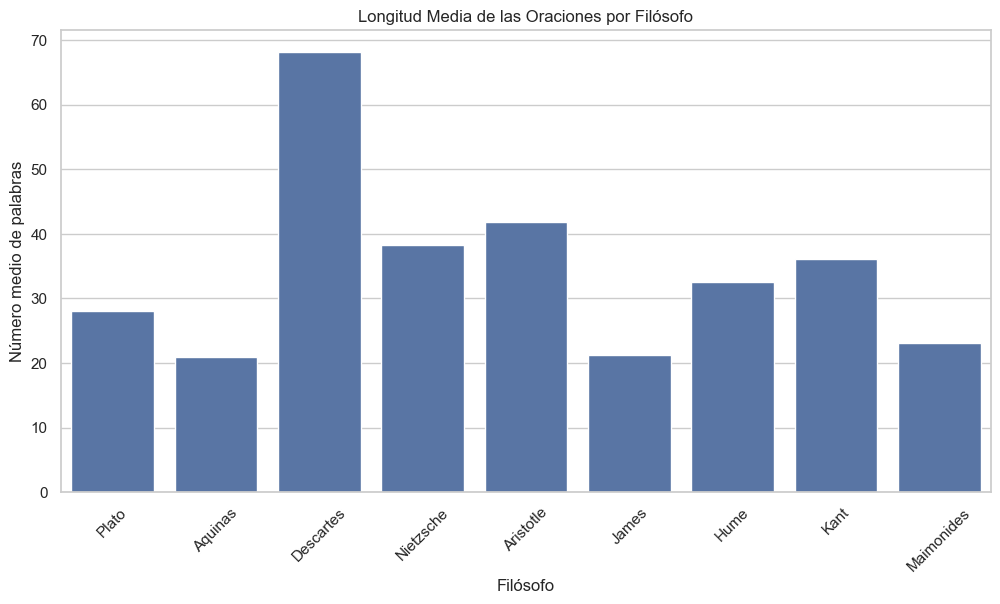

In [16]:
# Comparar la longitud media de las oraciones
plt.figure(figsize=(12, 6))
sns.barplot(x=df_pos.index, y=df_pos['avg_sentence_length'])
plt.title('Longitud Media de las Oraciones por Filósofo')
plt.ylabel('Número medio de palabras')
plt.xlabel('Filósofo')
plt.xticks(rotation=45)
plt.show()

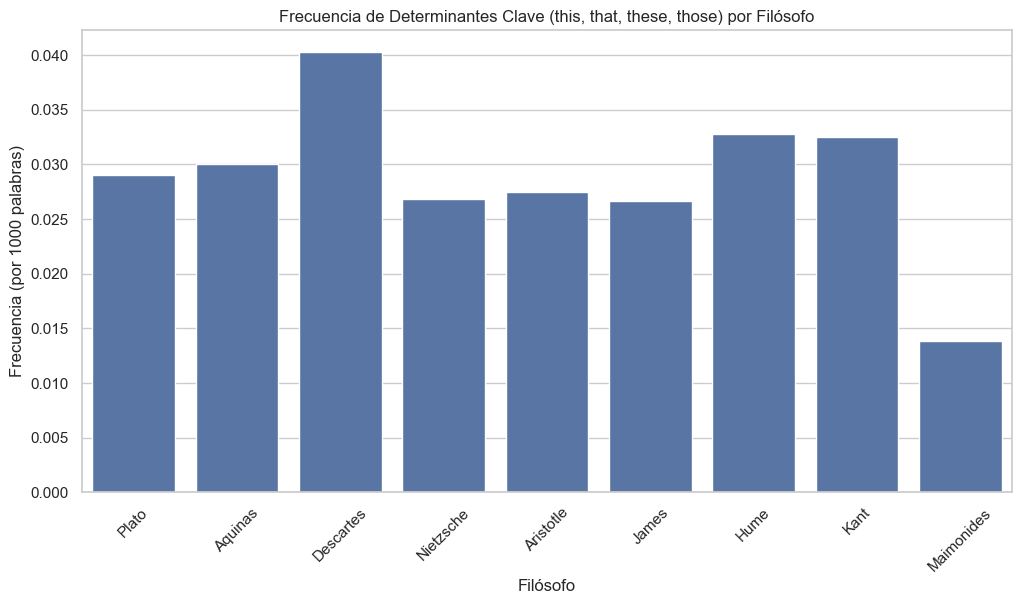

In [17]:
# Comparar la frecuencia de los determinantes objetivo
plt.figure(figsize=(12, 6))
sns.barplot(x=df_pos.index, y=df_pos['target_determiners_freq'])
plt.title('Frecuencia de Determinantes Clave (this, that, these, those) por Filósofo')
plt.ylabel('Frecuencia (por 1000 palabras)')
plt.xlabel('Filósofo')
plt.xticks(rotation=45)
plt.show()

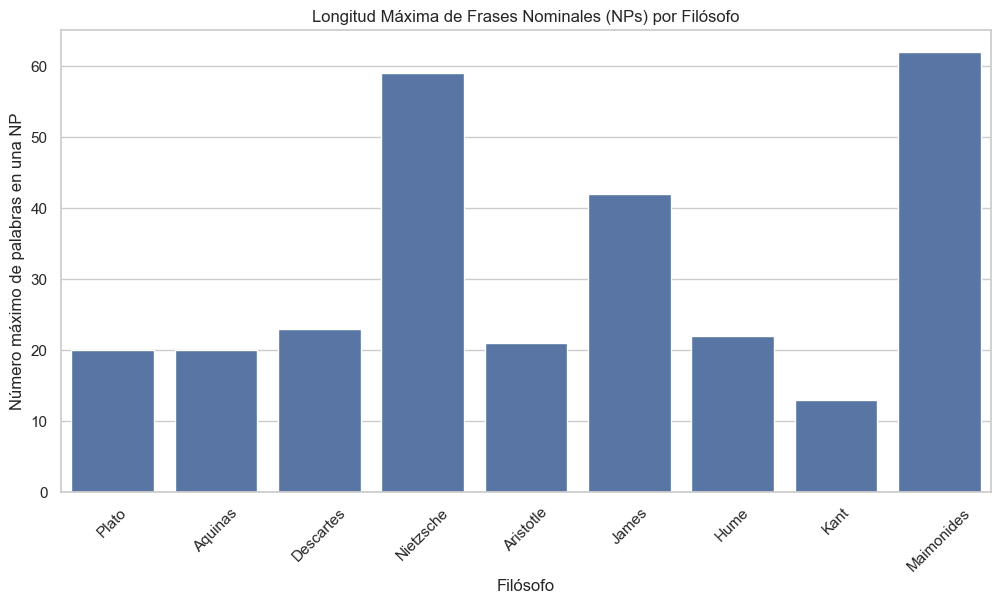

In [18]:
# Comparar la longitud máxima de las frases nominales
plt.figure(figsize=(12, 6))
sns.barplot(x=df_pos.index, y=df_pos['max_phrase_length'])
plt.title('Longitud Máxima de Frases Nominales (NPs) por Filósofo')
plt.ylabel('Número máximo de palabras en una NP')
plt.xlabel('Filósofo')
plt.xticks(rotation=45)
plt.show()